<center><h2>Explainable Machine Learning 2023/2024Z</h2></center>
<center><h3>Homework 2</h3></center>

Mateusz Szymański

# Task 1

We have two populations: <span style="color:blue">Blue</span> (privileged) and <span style="color:red">Red</span> (unprivileged), with the <span style="color:blue">Blue</span> population being 9 times larger than the <span style="color:red">Red</span> population.

Individuals from both populations are requesting to attend XAI training to improve competency in this important area. Number of places is limited. The administrators of the training have decided to give priority to enrolling individuals who may need this training in the future, although unfortunately it is difficult to predict who will benefit.

The decision rule adopted:

* In the <span style="color:red">Red</span> group, half of the people will find the skills useful in future and half will not. Administrators randomly allocate 50% of people to training.
* in the <span style="color:blue">Blue</span> group, 80% of people will find the training useful in future and 20% will not, although of course it is not known who will find it useful. The administrators have built a predictive model based on user behaviour in predicting for whom it will be useful and whom will not. The model has the following performance:

| <span style="color:blue">Blue</span> | Will use XAI | Will not use XAI | Total |
|--------------------------------------|--------------|------------------|-------|
| enrolled in a training | 60 | 5 | 65 |
| not enrolled in a training | 20 | 15 | 35 |
| total | 80 | 20 | 100 |

**Task**: Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.

**Starred task**: How can this decision rule be changed to improve its fairness?

## Solution

### Demographic parity

Let us remind that the *demographic parity* condition is defined as follows:

Let $A$ be a protected attribute and $a$ and $b$ be two mutually exclusive groups of $A$. A predictor $\hat{Y}$ satisfies the *demographic parity* condition if $\hat{Y}\perp A$, that is $\hat{Y}$ is independent of $A$: 

$$P\left(\hat{Y}=1|A=a\right)=P\left(\hat{Y}=1|A=b\right)$$

However, in concrete cases we cannot expect the equality here. We say that a predictor $\hat{Y}$ satisfies the demographic parity condition if for empirical data:

$$\frac{4}{5} \leq \frac{P\left(\hat{Y}=1|A=a\right)}{P\left(\hat{Y}=1|A=b\right)} \leq \frac{5}{4}$$

Let us remark that the notion of demographic parity ignores the target variable $Y$.

In our case, $Y$ denotes the property of using XAI in the future while $\hat{Y}$ denotes being chosen to an XAI course. Ideally, these two should coincide.

Let ${\color{blue}a}$ be the <span style="color:blue">Blue</span> group while ${\color{red}b}$ the <span style="color:red">Red</span> one. We can now calculate the empirical value of $P\left(\hat{Y}=1|A={\color{blue}a}\right)$ as the ratio of the number of students enrolled in a training to all students. Based on the table, $65\%$ of the students from the privileged group will be chosen for a training. That is, $P\left(\hat{Y}=1|A={\color{blue}a}\right)=\tfrac{65}{100}$.

Clearly, in the second group ${\color{red}b}$, half of the students will be chosen for a training. Hence, the conditional probability $P\left(\hat{Y}=1|A={\color{red}b}\right)$ is $\tfrac{1}{2}$.

The ratio of these two values is equal to:

$$\frac{P\left(\hat{Y}=1|A=a\right)}{P\left(\hat{Y}=1|A=b\right)} = \frac{\tfrac{65}{100}}{\tfrac{1}{2}} = \frac{13}{10} > \frac{5}{4}$$

The predictory $\hat{Y}$ **does not satisfy the demographic parity condition**.

### Equal opportunity

The *equal opportunity* criterion demands the following equality:

$$P\left(\hat{Y}=1|A=a,\ Y=1\right) = P\left(\hat{Y}=1|A=b,\ Y=1\right)$$

This means that the rate of True Positive Rate ($\textrm{TPR} = \frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}$) remains the same for both groups.

For the ${\color{blue}a}$ group, using the information from the table, we can expect $\textrm{TPR}_{\color{blue}a}$ to be:

$$\textrm{TPR}_{\color{blue}a}=\frac{\tfrac{60}{100}}{\tfrac{60}{100} + \tfrac{20}{100}}=\frac{3}{4}$$

In the second group ${\color{red}b}$, the allocation process is random. As we assume that the choice is random, we can expect that among half of the chosen students, half of them will find the course useful ($Y|(A={\color{red}b}) \perp \hat{Y}|(A={\color{red}b}))$). This gives us: $$\textrm{TPR}_{\color{red}b}=\frac{\tfrac{1}{4}}{\tfrac{1}{4} + \tfrac{1}{4}} = \frac{1}{2}$$

This equal opportunity condition is not satisfied, as the ratio of True Positive Rates exceeds the threshold:

$$\frac{\textrm{TPR}_{\color{blue}a}}{\textrm{TPR}_{\color{red}b}} = \frac{\tfrac{3}{4}}{\tfrac{1}{2}} = \frac{3}{2}>\frac{5}{4}$$

### Predictive Rate Parity

The *predictive rate parity* criterion is satisfied whenever the following equality holds:

$$P\left(Y=1|A=a,\ \hat{Y}=i\right) = P\left(Y=1|A=b,\ \hat{Y}=i\right)$$

for $i\in\{0,1\}$. In other words, $Y\perp A|\hat{Y}$.

The condition asks for equality of Positive/Negative Predictive Values ($\textrm{PPV} = \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}$, $\textrm{NPV} = \frac{\textrm{TN}}{\textrm{TN} + \textrm{FN}}$) in subgroups.

Let us calculate PPV and NPV for both groups:

$$\textrm{PPV}_{\color{blue}a} = \frac{\tfrac{60}{100}}{\tfrac{60}{100} + \tfrac{5}{100}} = \frac{12}{13}$$

$$\textrm{PPV}_{\color{red}b} = \frac{\tfrac{1}{4}}{\tfrac{1}{4} + \tfrac{1}{4}} = \frac{1}{2}$$

Since:

$$\frac{\textrm{PPV}_{\color{blue}a}}{\textrm{PPV}_{\color{red}b}} = \frac{\tfrac{12}{13}}{\tfrac{1}{2}} = \frac{24}{13} > \frac{5}{4}$$

we can safely say that the decision process is not fair in that regard.

### Increasing fairness

We assume that it is hard to:
* predict preferences in the <span style="color:red">Red</span> group
* improve the decision model for the <span style="color:blue">Blue</span> group

The only thing that we can control effortlessly is the ratio of allocated students from the unprivileged group ${\color{red}b}$. 

According to the current decision process and the group proportions, there is:

$$\frac{9}{10}\cdot\frac{65}{100} + \frac{1}{10}\cdot\frac{1}{2} = \frac{127}{200} = 63.5\%$$

vacant places per student.

If we could increase the number of places (additional 3 places per 200 current vacant places) just to allocate the same fraction $65\%$ of students in the unprivileged group, we could easily satisfy the demographic parity condition. As the process still remains random, the values TP, TN, FP, FN for the second group are the same, thus equal opportunity won't be still satisfied.

If it is not possible to increase the number of free places, we need to slightly decrease the amount of enrolled students from the <span style="color:blue">Blue</span> group.

### Extending the procedure

Assume that we cannot change the decision model for the privileged group. However, in order to decrease the number of enrolled students, after the decision process, we can randomly move some students from the positive class to the second group. The updated table is now:

| <span style="color:blue">Blue</span> | Will use XAI | Will not use XAI | Total |
|--------------------------------------|--------------|------------------|-------|
| enrolled in a training | 60 - $\tfrac{60}{65}x$ | 5 - $\tfrac{5}{65}x$ | 65 - $x$ |
| not enrolled in a training | 20 + $\tfrac{60}{65}x$ | 15 + $\tfrac{5}{65}x$| 35 + $x$ |
| total | 80 | 20 | 100 |

This, obviously, harms the <span style="color:blue">Blue</span> group but we aim to show that the number of students $x$ is quite small.

Now, we have to parameters to control:
* the fraction $y$ of allocated students in the <span style="color:red">Red</span> group
* the number of students $x$ (per each group of 100 students) from the <span style="color:blue">Blue</span> group

We want to satisfy the demographic parity condition while maintain the total number of students enrolled to a training. Hence:

$$\frac{9}{10}\cdot \frac{65-x}{100}+\frac{1}{10}\cdot y = \frac{127}{200}$$

and

$$\frac{65-x}{100}=y$$

The solution of the equation above is:

$$\begin{cases}x = \frac{3}{2} \\ y = \frac{127}{200}\end{cases}$$

Hence we lose only 3 students per each 200 students in the <span style="color:blue">Blue</span> group. The updated table is now:

| <span style="color:blue">Blue</span> | Will use XAI | Will not use XAI | Total |
|--------------------------------------|--------------|------------------|-------|
| enrolled in a training | 0.586 | 0.488 | 0.635 |
| not enrolled in a training | 0.214 | 0.151 | 0.365 |
| total | 0.800 | 0.200 | 1.000 |

The new TPR for ${\color{blue}a}$ is:

$$\textrm{TPR}_{\color{blue}a}=\frac{\tfrac{60}{100} - \tfrac{60}{65}\tfrac{3}{200}}{\tfrac{80}{100}}=73.27\%$$

However the change is too small to improve the equal opportunity criterion.

We assumed that there is no viable way of determining preferences of the <span style="color:red">Red</span> group. This implies that, if we are forced to use a random assignment, we have no measures to change the TPR/FPR. This severely reduces a chance for increasing fairness in terms of other conditions.

# Task 2

We have chosen _Adult income dataset_ to investigate (`adults.csv`). The data contains an information whether the annual income is greater than 50 000 (probably USD) and several columns describing a person, including:
* age
* gender
* race
* marital status

which may be considered as protected attributes. Our goal is to examine fairness measures for trained models.

We are going to use several vanilla models for tabular data, used in the previous Homework:
* logistic regression
* random forest classifier

We divide the data in the train-test ratio of 4:1.

**Important note**: a package `dalex` could be used for calculating all necessary fairness measures. However, we are going to calculate them by hand.

## Protected attribute distribution

The `race` column have several values:
* _White_
* _Black_
* _Asian-Pac-Islander_
* _Amer-Indian-Eskimo_
* _Other_

The _White_ group is clearly a dominant one ($85.5\%$). The second one, _Black_, takes $9.6\%$ of all participants.

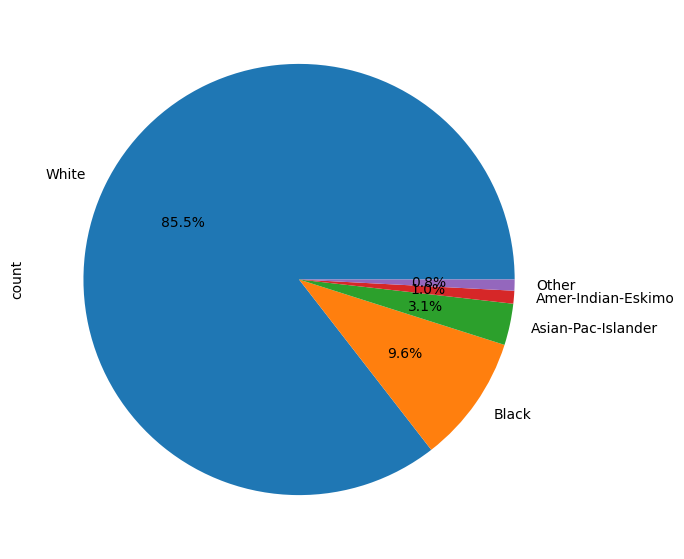</img>

## Target variable distribution among different races

Before we attempt to calculate the demographic parity condition, we need to check how the target variable behaves under different race groups.

| race                 |   income |
|:---------------------|---------:|
| _Amer-Indian-Eskimo_ | 0.117021 |
| _Asian-Pac-Islander_ | 0.269256 |
| _Black_              | 0.120811 |
| _Other_              | 0.123153 |
| _White_              | 0.253987 |

It is evident that the _White_ group is privileged in this context. Similarly, _Asian-Pac-Islander_ group has a even larger rate of people earning more than 50 000 USD annually. Hence, we don't expect any trained model to be satisfying demographic parity condition.

It is still, however, in question, whether other conditions are going to be violated.

## Multi-class measures

The classic measure for demographic parity and other conditions is defined for two groups. We propose an extension for multi-class setting as follows. Let $(a_i)_{i\in I}$ be mutually exclusive groups from a protected attribute $A$. Then a predictor $\hat{Y}$ satisfies the demographic parity condition whenever

$$P\left(\hat{Y}=1|A=a_i\right) = P\left(\hat{Y}=1|A\neq a_i\right)$$

for each $i\in I$. Similarly we define other measures.

## Score metric

As the exact equality is almost never demanded, we propose a simple score metric for measuring ratio deviation:

$$S(x,y) = |\ln(x) - \ln(y)|$$

The smaller deviation from $1$ is, the better score is. The score is invariant to the transformation $x\mapsto \tfrac{1}{x}$. We set the threshold $\tau=\ln \tfrac{5}{4}$ corresponding to the commonly accepted _four-fifths_ rule. For a multi-class comparison, we may employ a _not a single one discriminated group_ principle, which means the overall score is **the maximum value** of all scores. This focuses on the worst aspect of a predictor instead of allowing averaging the general score at the expense of the most unprivileged group(s).

## Logistic regression

A simple logistic regression has been trained. It barely exceeds the constant model performance.

| | accuracy | $F_1$ score |
|-|-|-|
| train | 79.68% | 38.16% |
| test | 80.37% | 39.23% |

### Demographic parity

As it has been noticed, it is hard to expect any classifier to satisfy the demographic parity. We can observe than the most unprivileged group is _Black_.

| race               |     value |   value_comp |    ratio |     score | threshold   |
|:-------------------|----------:|-------------:|---------:|----------:|:------------|
| _Black_              | 0.0529349 |    0.084952  | 0.62312 | 0.473023  | False       |
| _Amer-Indian-Eskimo_ | 0.0659574 |    0.095745 | 0.68889 | 0.372675  | False       |
| _Other_              | 0.0640394 |    0.086207 | 0.74286 | 0.297252  | False       |
| _Asian-Pac-Islander_ | 0.0980908 |    0.081633 | 1.20161  | 0.183665  | True        |
| _White_              | 0.0923327 |    0.088789 | 1.03991  | 0.039137  | True        |

Here's a brief explanation of the table:
* `value` describes the value of the considered measure ($P\left(\hat{Y}=1|A=a_i\right)$ here) for a group
* `value_comp` describes the value of considered measure for the complement of a group
* `ratio` is the ratio of the two above
* `score` is the calculated deviation score for a group
* `threshold` tells whether the group satisfies four-fifths rule

### Equal opportunity

The logistic regression model turned to be mostly satisfying this condition. Only one group is observed to have this condition violated, namely _Amer-Indian-Eskimo_. Besides the second-worst group in this regard, _Black_, the last three groups have very good score.

| race               |    value |   value_comp |    ratio |     score | threshold   |
|:-------------------|---------:|-------------:|---------:|----------:|:------------|
| _Amer-Indian-Eskimo_ | 0.516129 |     0.755556 | 0.68311 | 0.381097  | False       |
| _Black_              | 0.600806 |     0.721106 | 0.83317 | 0.182513  | True        |
| _Asian-Pac-Islander_ | 0.697987 |     0.741935 | 0.94077 | 0.061062 | True        |
| _Other_              | 0.615385 |     0.628571 | 0.97902 | 0.021202 | True        |
| _White_              | 0.721992 |     0.710356 | 1.01638 | 0.016247 | True        |

The overall score $0.38$ still exceeds the allowed threshold.

### Predictive Rate Parity

The model violates equality of positive predictive value, as it has been shown in the table below:

| race               |    value |   value_comp |    ratio |    score | threshold   |
|:-------------------|---------:|-------------:|---------:|---------:|:------------|
| _Amer-Indian-Eskimo_ | 0.277778 |     0.120879 | 2.29798  | 0.832030 | False       |
| _Black_              | 0.191860 |     0.121577 | 1.57810  | 0.456219 | False       |
| _Other_              | 0.227273 |     0.173333 | 1.31119  | 0.270934 | False       |
| _Asian-Pac-Islander_ | 0.128571 |     0.107383 | 1.19732  | 0.180087 | True        |
| _White_              | 0.120517 |     0.126621 | 0.95180  | 0.049407 | True        |

What's interesting, negative predictive value is satisfied.

| race               |    value |   value_comp |    ratio |       score | threshold   |
|:-------------------|---------:|-------------:|---------:|------------:|:------------|
| _Asian-Pac-Islander_ | 0.959459 |     0.972438 | 0.98665 | 0.0134358   | True        |
| _Other_              | 0.97191  |     0.959627 | 1.01280  | 0.0127183   | True        |
| _Black_              | 0.975965 |     0.969132 | 1.00705  | 0.0070256   | True        |
| _Amer-Indian-Eskimo_ | 0.963855 |     0.969101 | 0.99458 | 0.0054277   | True        |
| _White_              | 0.965591 |     0.966141 | 0.99943 | 0.0005693   | True        |


Here's the summary (the higher metric, the worse model is):

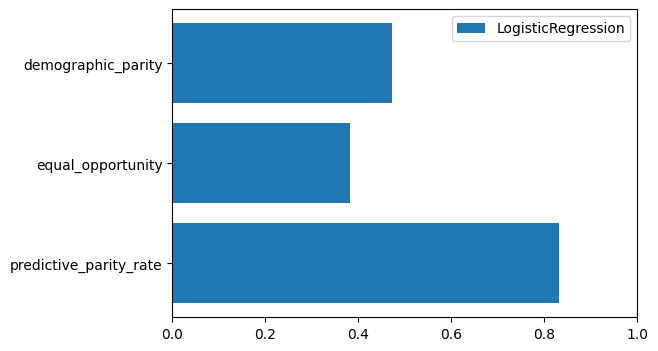</img>

### Conclusion

The logistic regression, regardless of the questionable accuracy, is hardly considered a fair model. However, it almost satisfies the equal opportunity condition.

## Random Forest Classifier

The random forest outperformed the logistic regression model. The following table shows performance metrics for this model:

| | accuracy | $F_1$ score |
|-|-|-|
| train | 99.98% | 86.04% |
| test | 99.97% | 68.35% |

### Demographic parity

It is no surprise that `RandomForestClassifier` fails at this criterion.

| race               |    value |   value_comp |    ratio |     score | threshold   |
|:-------------------|---------:|-------------:|---------:|----------:|:------------|
| _Amer-Indian-Eskimo_ | 0.114894 |     0.242553 | 0.47368 | 0.747214  | False       |
| _Black_              | 0.117182 |     0.228815 | 0.51213 | 0.669183  | False       |
| _Other_              | 0.118227 |     0.209360 | 0.56471 | 0.571450  | False       |
| _Asian-Pac-Islander_ | 0.267281 |     0.236340 | 1.13092  | 0.123031  | True        |
| _White_              | 0.248072 |     0.234352 | 1.05855  | 0.056897  | True        |

Although race classes are have feature importance of $2.5\%$ in total, the predictor is even more discriminating that the previous model. However, as it can be seen, the `value` columns resembles the actual means from the empirical distribution and this condition is hard to satisfy without compromising the model accuracy.

### Equal opportunity

The model is very fair considering the equal opportunity criterion.

| race               |    value |   value_comp |    ratio |      score | threshold   |
|:-------------------|---------:|-------------:|---------:|-----------:|:------------|
| _Other_              | 0.979167 |     0.917647 | 1.06704  | 0.06488900 | True        |
| _Amer-Indian-Eskimo_ | 0.962963 |     0.947368 | 1.01646  | 0.01632690 | True        |
| _Asian-Pac-Islander_ | 0.953202 |     0.944290 | 1.00944  | 0.00939381 | True        |
| _Black_              | 0.947177 |     0.945896 | 1.00135  | 0.00135353 | True        |
| _White_              | 0.951834 |     0.953101 | 0.99867  | 0.00133031 | True        |


There is no discriminated group, which is a fairly good result.

### Predictive Rate Parity

This condition is not fulfilled. The _Other_ group is a witness of that:

| race               |    value |   value_comp |    ratio |     score | threshold   |
|:-------------------|---------:|-------------:|---------:|----------:|:------------|
| Other_              | 0.250000 |     0.538462 | 0.464286 | 0.767255  | False       |
| Amer-Indian-Eskimo_ | 0.400000 |     0.500000 | 0.800000 | 0.223144  | True        |
| Black_              | 0.386667 |     0.436090 | 0.886667 | 0.120286  | True        |
| Asian-Pac-Islander_ | 0.463415 |     0.512821 | 0.903659 | 0.101304  | True        |
| White_              | 0.400803 |     0.391304 | 1.024270 | 0.023985  | True        |

As previously, NPV is preserved:

| race               |    value |   value_comp |    ratio |       score | threshold   |
|:-------------------|---------:|-------------:|---------:|------------:|:------------|
| _Other_              | 0.997191 |     0.978261 | 1.01935  | 0.0191660   | True        |
| _Amer-Indian-Eskimo_ | 0.995181 |     0.983146 | 1.01224  | 0.0121666   | True        |
| _Black_              | 0.992959 |     0.983871 | 1.00924  | 0.0091951  | True        |
| _White_              | 0.983983 |     0.985530 | 0.99843  | 0.0015703  | True        |
| _Asian-Pac-Islander_ | 0.982883 |     0.982773 | 1.00011  | 0.0001113  | True        |



Here's the summary:

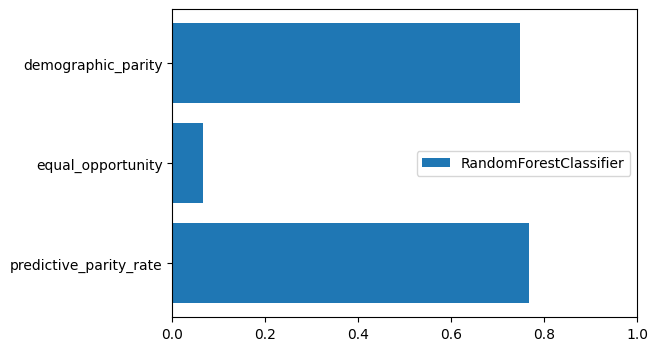</img>

### Conclusion

The model turned out to be fair considering equal opportunities. As previously, the random forest model is not fair in the remaining aspects.

### Improving fairness

As we discussed, there is no viable way of improving demographic parity without compromising the accuracy. As the equal opportunities are realized (or almost realized), the question is: _can we improve the predictive rate parity?_

In order to do that, we followed the following steps:
* We created an artificial training set containing equal number race representants with the same proportion of positive/negative classes
* We changed the threshold of a model to balance between PPV and NPV
* We removed columns corresponding to one-hot-encoding of a race (although it is not expected to help much)

We couldn't satisfy four-fifths rule but we got close to that. This severely degraded the performance

| | accuracy | $F_1$ score |
|-|-|-|
| train | 48.22% | 16.05% |
| test | 53.25% | 28.32% |

### Demographic parity

Demographic parity has been _almost_ achieved. _Amer-Indian-Eskimo_ slightly violates the four-fifths rule.

| race               |    value |   value_comp |    ratio |      score | threshold   |
|:-------------------|---------:|-------------:|---------:|-----------:|:------------|
| _Amer-Indian-Eskimo_ | 0.568085 |     0.425532 | 1.33500  | 0.288931   | False       |
| _Asian-Pac-Islander_ | 0.516787 |     0.416063 | 1.24209  | 0.216794   | True        |
| _Black_              | 0.344077 |     0.419851 | 0.81952  | 0.199034   | True        |
| _Other_              | 0.502463 |     0.460591 | 1.09091  | 0.087011   | True        |
| _White_              | 0.424142 |     0.421316 | 1.00671  | 0.006684  | True        |

### Equal opportunity

The model doesn't give equal opportunities as it is shown in the following table. The deviations are quite high.

| race               |    value |   value_comp |    ratio |     score | threshold   |
|:-------------------|---------:|-------------:|---------:|----------:|:------------|
| _Black_              | 0.111658 |     0.212920 | 0.52441  | 0.645478  | False       |
| _Amer-Indian-Eskimo_ | 0.120521 |     0.215768 | 0.55857  | 0.582377  | False       |
| _Other_              | 0.112069 |     0.169725 | 0.66030  | 0.415064  | False       |
| _Asian-Pac-Islander_ | 0.234066 |     0.200269 | 1.16876  | 0.155942  | True        |
| _White_              | 0.227230 |     0.216784 | 1.04818  | 0.047058  | True        |

This is a hint showing that increasing one fairness measure is negatively correlated with other fairness measures.

### Predictive Rate Parity

Finally, let us show PPV and NPV for the last model

| race               |    value |   value_comp |    ratio |     score | threshold   |
|:-------------------|---------:|-------------:|---------:|----------:|:------------|
| _Amer-Indian-Eskimo_ | 0.910853 |     0.697248 | 1.30635  | 0.267240  | False       |
| _Other_              | 0.866667 |     0.753695 | 1.14989  | 0.139667  | True        |
| _Black_              | 0.795814 |     0.701932 | 1.13375  | 0.125530 | True        |
| _Asian-Pac-Islander_ | 0.728155 |     0.689751 | 1.05568  | 0.054184 | True        |
| _White_              | 0.678202 |     0.691886 | 0.98022  | 0.019975 | True        |

| race               |    value |   value_comp |    ratio |      score | threshold   |
|:-------------------|---------:|-------------:|---------:|-----------:|:------------|
| _Amer-Indian-Eskimo_ | 0.433735 |     0.573034 | 0.75691 | 0.278511   | False       |
| _Asian-Pac-Islander_ | 0.459459 |     0.571059 | 0.80457 | 0.217443   | True        |
| _Black_              | 0.658412 |     0.575640 | 1.14379 | 0.134349   | True        |
| _Other_              | 0.488764 |     0.524845 | 0.93126 | 0.071223   | True        |
| _White_              | 0.565977 |     0.570712 | 0.99170 | 0.008333   | True        |

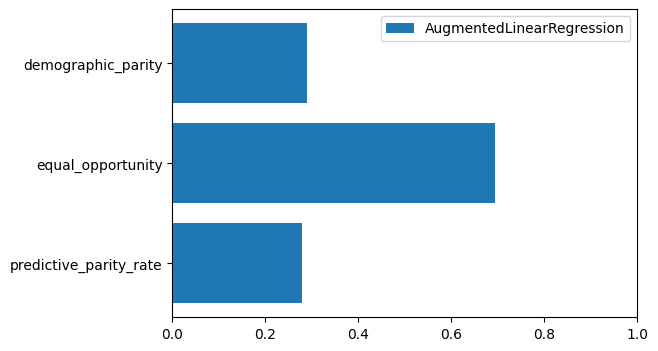</img>

## Conclusions

We were able to improve significantly Predictive Rate Parity and the demographic parity at the same time, however at the expense of accuracy and equal opportunity condition.

In general, improving fairness conditions reduces the performance metrics, especially when the unwanted bias is already in the data. Lowering accuracy of a biased model is a side-effect of other phenomena which is minimizing unwanted biases.

As satisfying all fairness criteria is almost never possible for concrete cases, this manifests in the results as a negative correlation between these. We leave that statement without exact computations of correlations as we find it rather evident from the examples above.

# Appendix 

## Packages import

In [1]:
from typing import Callable

import dalex as dx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

## Auxiliary functions

In [3]:
def get_train_test_metric(model, metric, X_train, X_test, y_train, y_test):
    accuracy_train = metric(model.predict(X_train), y_train)
    accuracy_test  = metric(model.predict(X_test),  y_test)
    return accuracy_train, accuracy_test


def get_train_test_accuracy(model, X_train, X_test, y_train, y_test):
    return get_train_test_metric(model, accuracy_score, X_train, X_test, y_train, y_test)


def get_train_test_f1_score(model, X_train, X_test, y_train, y_test):
    return get_train_test_metric(model, f1_score, X_train, X_test, y_train, y_test)

In [4]:
def print_results(train_accuracy, test_accuracy, train_f1_score, test_f1_score):
    print('''Train accuracy: {:.2f}%
Test accuracy:  {:.2f}%

Train F1 score: {:.2f}%
Test F1 score:  {:.2f}%
'''.format(
        100 * train_accuracy, 100 * test_accuracy,
        100 * train_f1_score, 100 * test_f1_score
    ))

## Data analysis

In [5]:
df = pd.read_csv('adult.csv')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype('int8')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [6]:
races = list(dict(sorted(df['race'].value_counts().items(), key=lambda x: x[1], reverse=True)))
display(races)

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

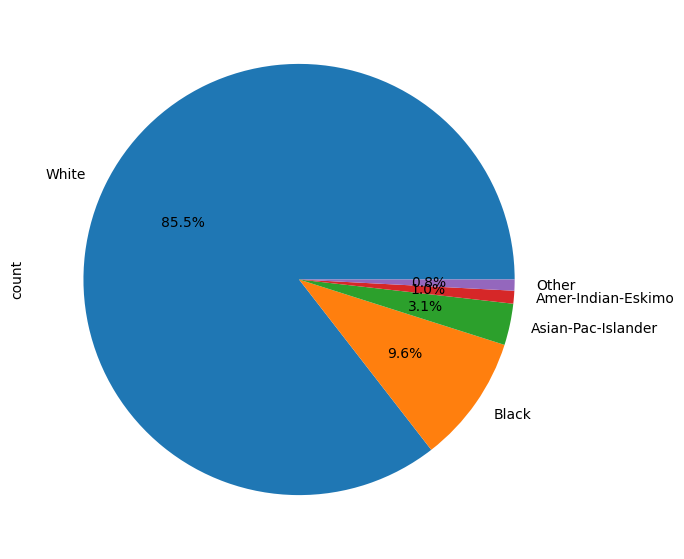

In [7]:
plt.figure
df['race'].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.show()

In [8]:
df[['race', 'income']].groupby('race').mean()

,income
race,
Amer-Indian-Eskimo,0.117021
Asian-Pac-Islander,0.269256
Black,0.120811
Other,0.123153
White,0.253987


## Model training

In [9]:
X = pd.get_dummies(df.iloc[:, :-1]).to_numpy()
y = df['income'].to_numpy()
y.mean()

0.23928176569346055

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [11]:
# group by race

indices = {}
df_groups = df.groupby('race')
for race in races:
    indices[race] = df_groups.get_group(race).index

In [12]:
def get_group_data(race, X=X, y=y, indices=indices):
    X_test_group = X[indices[race]]
    y_test_group = y[indices[race]]
    X_test_comp_group = X[~indices[race]]
    y_test_comp_group = y[~indices[race]]
    return X_test_group, X_test_comp_group, y_test_group, y_test_comp_group

In [13]:
def get_results(model, X_train, X_test, y_train, y_test):
    train_accuracy, test_accuracy = get_train_test_accuracy(
        model, X_train, X_test, y_train, y_test
    )

    train_f1_score, test_f1_score = get_train_test_f1_score(
        model, X_train, X_test, y_train, y_test
    )
    
    return (
        train_accuracy, test_accuracy,
        train_f1_score, test_f1_score
    )

In [14]:
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression.fit(X_train, y_train)

(
    logistic_regression_train_accuracy, logistic_regression_test_accuracy,
    logistic_regression_train_f1_score, logistic_regression_test_f1_score
) = get_results(logistic_regression, X_train, X_test, y_train, y_test)


print_results(
    logistic_regression_train_accuracy, logistic_regression_test_accuracy,
    logistic_regression_train_f1_score, logistic_regression_test_f1_score
)

Train accuracy: 79.68%
Test accuracy:  80.37%

Train F1 score: 38.16%
Test F1 score:  39.23%



In [15]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest.fit(X_train, y_train)

(
    random_forest_train_accuracy, random_forest_test_accuracy,
    random_forest_train_f1_score, random_forest_test_f1_score
) = get_results(random_forest, X_train, X_test, y_train, y_test)


print_results(
    random_forest_train_accuracy, random_forest_test_accuracy,
    random_forest_train_f1_score, random_forest_test_f1_score
)

Train accuracy: 99.98%
Test accuracy:  86.04%

Train F1 score: 99.97%
Test F1 score:  68.35%



## Scores and metrics

In [16]:
# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]

def TPR(matrix):
    TP = matrix[1][1]
    FN = matrix[1][0]
    return TP / (TP + FN)

def TNR(matrix):
    TN = matrix[0][0]
    FP = matrix[0][1]
    return TN / (TN + FP)

def PPV(matrix):
    TP = matrix[1][0]
    FP = matrix[0][1]
    return TP / (TP + FP)

def NPV(matrix):
    TN = matrix[0][0]
    FN = matrix[1][0]
    return TN / (TN + FN)

In [17]:
THRESHOLD = np.log(5 / 4)


def score(x, y):
    return np.abs(np.log(x / y))

In [18]:
def demographic_parity(model, indices=indices):
    rows = []
    for race in races:
        X_test_group, X_test_comp_group, y_test_group, y_test_comp_group = get_group_data(race, indices=indices)
        y_test_pred = model.predict(X_test_group)
        y_test_comp_pred = model.predict(X_test_comp_group)
        
        value = y_test_pred.mean()
        value_comp = y_test_comp_pred.mean()
        value_score = score(value, value_comp)
        rows.append((race, value, value_comp, value / value_comp, value_score, value_score < THRESHOLD))
        
    return pd.DataFrame(rows, columns=[
        'race', 'value', 'value_comp', 'ratio', 'score', 'threshold'
    ]).set_index('race').sort_values('score', ascending=False)

In [19]:
def calculate_score(model, metric: Callable, indices=indices) -> pd.DataFrame:
    rows = []
    for race in races:
        X_test_group, X_test_comp_group, y_test_group, y_test_comp_group = get_group_data(race, indices=indices)

        y_test_pred = model.predict(X_test_group)
        y_test_comp_pred = model.predict(X_test_comp_group)

        matrix = confusion_matrix(y_test_pred, y_test_group)
        matrix_comp = confusion_matrix(y_test_comp_pred, y_test_comp_group)

        value = metric(matrix)
        value_comp = metric(matrix_comp)
        value_score = score(value, value_comp)
        rows.append((race, value, value_comp, value / value_comp, value_score, value_score < THRESHOLD))
        
    return pd.DataFrame(rows, columns=[
        'race', 'value', 'value_comp', 'ratio', 'score', 'threshold'
    ]).set_index('race').sort_values('score', ascending=False)

In [20]:
def get_overall_scores(model, indices=indices) -> pd.DataFrame:
    dp = demographic_parity(model, indices=indices)['score'].max()
    tpr = calculate_score(model, TPR, indices=indices)['score'].max()
    parity = max(
        calculate_score(model, PPV, indices=indices)['score'].max(),
        calculate_score(model, NPV, indices=indices)['score'].max()
    )

    return pd.DataFrame([[dp, tpr, parity]], columns=[
        'demographic_parity', 'equal_opportunity', 'predictive_parity_rate'
    ])

In [21]:
def draw_scores(scores, label: str):
    keys = list(scores.T.index)
    values = list(scores.T[0])
    plt.figure(figsize=(6, 4))
    plt.barh(keys[::-1], values[::-1], label=label)
    plt.xlim([0, 1])
    plt.legend()
    plt.show()

In [22]:
display(demographic_parity(logistic_regression))
display(calculate_score(logistic_regression, TPR))
display(calculate_score(logistic_regression, PPV))
display(calculate_score(logistic_regression, NPV))

logistic_regression_scores = get_overall_scores(logistic_regression)
display(logistic_regression_scores)

,value,value_comp,ratio,score,threshold
race,,,,,
Black,0.052935,0.084952,0.623116,0.473023,False
Amer-Indian-Eskimo,0.065957,0.095745,0.688889,0.372675,False
Other,0.064039,0.086207,0.742857,0.297252,False
Asian-Pac-Islander,0.098091,0.081633,1.201613,0.183665,True
White,0.092333,0.088789,1.039914,0.039138,True


,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.516129,0.755556,0.683112,0.381097,False
Black,0.600806,0.721106,0.833174,0.182513,True
Asian-Pac-Islander,0.697987,0.741935,0.940765,0.061062,True
Other,0.615385,0.628571,0.979021,0.021202,True
White,0.721992,0.710356,1.016380,0.016247,True


,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.277778,0.120879,2.297980,0.832030,False
Black,0.191860,0.121577,1.578096,0.456219,False
Other,0.227273,0.173333,1.311189,0.270934,False
Asian-Pac-Islander,0.128571,0.107383,1.197321,0.180087,True
White,0.120517,0.126621,0.951794,0.049407,True


,value,value_comp,ratio,score,threshold
race,,,,,
Asian-Pac-Islander,0.959459,0.972438,0.986654,0.013436,True
Other,0.971910,0.959627,1.012800,0.012718,True
Black,0.975965,0.969132,1.007050,0.007026,True
Amer-Indian-Eskimo,0.963855,0.969101,0.994587,0.005428,True
White,0.965591,0.966141,0.999431,0.000569,True


,demographic_parity,equal_opportunity,predictive_parity_rate
0,0.473023,0.381097,0.83203


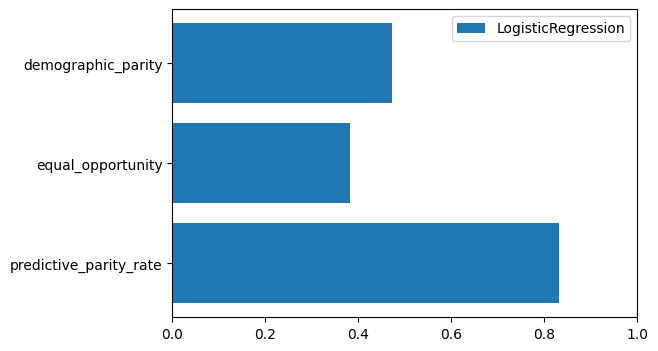

In [23]:
draw_scores(logistic_regression_scores, 'LogisticRegression')

In [24]:
display(demographic_parity(random_forest))
display(calculate_score(random_forest, TPR))
display(calculate_score(random_forest, PPV))
display(calculate_score(random_forest, NPV))

random_forest_scores = get_overall_scores(random_forest)
display(random_forest_scores)

,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.114894,0.242553,0.473684,0.747214,False
Black,0.117182,0.228815,0.512127,0.669183,False
Other,0.118227,0.209360,0.564706,0.571450,False
Asian-Pac-Islander,0.267281,0.236340,1.130919,0.123031,True
White,0.248072,0.234352,1.058547,0.056897,True


,value,value_comp,ratio,score,threshold
race,,,,,
Other,0.979167,0.917647,1.067041,0.064889,True
Amer-Indian-Eskimo,0.962963,0.947368,1.016461,0.016327,True
Asian-Pac-Islander,0.953202,0.944290,1.009438,0.009394,True
Black,0.947177,0.945896,1.001354,0.001354,True
White,0.951834,0.953101,0.998671,0.001330,True


,value,value_comp,ratio,score,threshold
race,,,,,
Other,0.250000,0.538462,0.464286,0.767255,False
Amer-Indian-Eskimo,0.400000,0.500000,0.800000,0.223144,True
Black,0.386667,0.436090,0.886667,0.120286,True
Asian-Pac-Islander,0.463415,0.512821,0.903659,0.101304,True
White,0.400803,0.391304,1.024275,0.023985,True


,value,value_comp,ratio,score,threshold
race,,,,,
Other,0.997191,0.978261,1.019351,0.019166,True
Amer-Indian-Eskimo,0.995181,0.983146,1.012241,0.012167,True
Black,0.992959,0.983871,1.009237,0.009195,True
White,0.983983,0.985530,0.998431,0.001570,True
Asian-Pac-Islander,0.982883,0.982773,1.000111,0.000111,True


,demographic_parity,equal_opportunity,predictive_parity_rate
0,0.747214,0.064889,0.767255


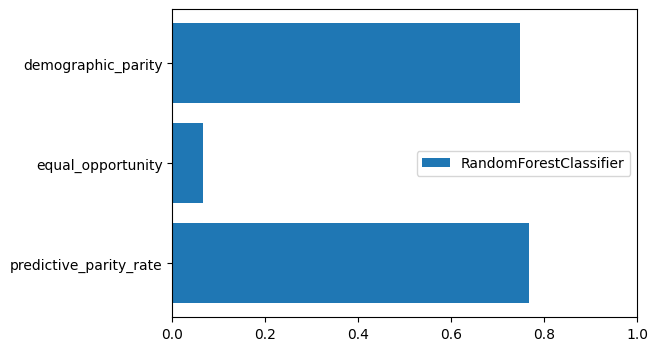

In [25]:
draw_scores(random_forest_scores, 'RandomForestClassifier')

In [26]:
# race importance
random_forest.feature_importances_[60:65].sum()

0.025178542653890704

## Augmenting the `LogisticRegression` model

In [27]:
PROPORTION = 0.11

minimal_group = min(len(df_groups.get_group(race)) for race in races) // 2
np.random.seed(RANDOM_STATE)

weighted_indices = {}
for race in races:
    df_race = df_groups.get_group(race)
    df_race_pos = df_race[df_race['income'] == 1]
    df_race_neg = df_race[df_race['income'] == 0]
    positive = list(np.random.choice(df_race_pos.index, int(minimal_group * PROPORTION)))
    negative = list(np.random.choice(df_race_neg.index, int(minimal_group * (1 - PROPORTION))))
    weighted_indices[race] = positive + negative

In [28]:
all_indices = sum(weighted_indices.values(), [])

In [29]:
aug_logistic_regression = LogisticRegression(random_state=RANDOM_STATE)

def predict_with_threshold(X, threshold=0.900):
    return (aug_logistic_regression.predict_proba(X)[:, 0] < threshold).astype(int)

X_prime = X[all_indices]
X_prime[60:65] = 0  # hide information about races
y_prime = y[all_indices]

aug_logistic_regression.predict = predict_with_threshold
aug_logistic_regression.fit(X_prime, y_prime)

(
    aug_logistic_regression_train_accuracy, aug_logistic_regression_test_accuracy,
    aug_logistic_regression_train_f1_score, aug_logistic_regression_test_f1_score
) = get_results(aug_logistic_regression, X_prime, X_test, y_prime, y_test)


print_results(
    aug_logistic_regression_train_accuracy, aug_logistic_regression_test_accuracy,
    aug_logistic_regression_train_f1_score, aug_logistic_regression_test_f1_score
)

Train accuracy: 48.22%
Test accuracy:  53.25%

Train F1 score: 16.05%
Test F1 score:  28.32%



In [30]:
display(demographic_parity(aug_logistic_regression))
display(calculate_score(aug_logistic_regression, TPR))
display(calculate_score(aug_logistic_regression, PPV))
display(calculate_score(aug_logistic_regression, NPV))

aug_logistic_regression_scores = get_overall_scores(aug_logistic_regression)
display(aug_logistic_regression_scores)

,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.568085,0.425532,1.335000,0.288931,False
Asian-Pac-Islander,0.516787,0.416063,1.242089,0.216794,True
Black,0.344077,0.419851,0.819522,0.199034,True
Other,0.502463,0.460591,1.090909,0.087011,True
White,0.424142,0.421316,1.006706,0.006684,True


,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.119850,0.240000,0.499376,0.694396,False
Black,0.127171,0.224199,0.567224,0.567001,False
Other,0.107843,0.181818,0.593137,0.522329,False
Asian-Pac-Islander,0.235669,0.212025,1.111513,0.105722,True
White,0.236606,0.226087,1.046526,0.045476,True


,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.910853,0.697248,1.306355,0.267240,False
Other,0.866667,0.753695,1.149891,0.139667,True
Black,0.795814,0.701932,1.133749,0.125530,True
Asian-Pac-Islander,0.728155,0.689751,1.055679,0.054184,True
White,0.678202,0.691886,0.980223,0.019975,True


,value,value_comp,ratio,score,threshold
race,,,,,
Amer-Indian-Eskimo,0.433735,0.573034,0.756910,0.278511,False
Asian-Pac-Islander,0.459459,0.571059,0.804574,0.217443,True
Black,0.658412,0.575640,1.143792,0.134349,True
Other,0.488764,0.524845,0.931255,0.071223,True
White,0.565977,0.570712,0.991702,0.008333,True


,demographic_parity,equal_opportunity,predictive_parity_rate
0,0.288931,0.694396,0.278511


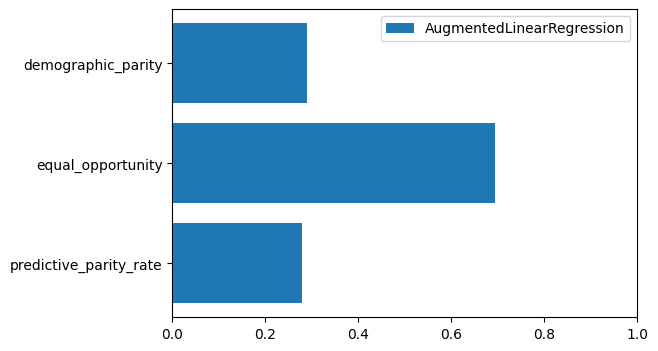

In [31]:
draw_scores(aug_logistic_regression_scores, 'AugmentedLinearRegression')